Задание 1

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Разобьём данные на тренировочный и тестовый датасеты.

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))


До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

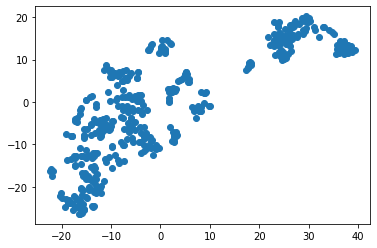

In [36]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

Задание 2

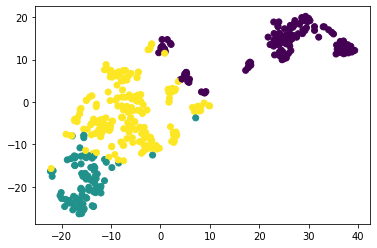

In [107]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, max_iter=300)

train_labels = model.fit_predict(X_train_scaled)
train_labels
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)

plt.show()

In [119]:
X_train_tsne[labels_train == 0].mean()

-16.922886

In [100]:
X_train_tsne[labels_train == 1].mean()

18.145206

In [101]:
X_train_tsne[labels_train == 2].mean()

-4.2786794

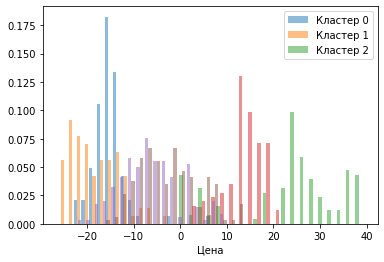

In [120]:
plt.hist(X_train_tsne[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(X_train_tsne[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(X_train_tsne[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1','Кластер 2' ])
plt.xlabel('Цена')

plt.show()

In [105]:
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Кластер 0: 0.0721184705882353
Кластер 1: 10.715219062500003
Кластер 1: 0.42098554973821983


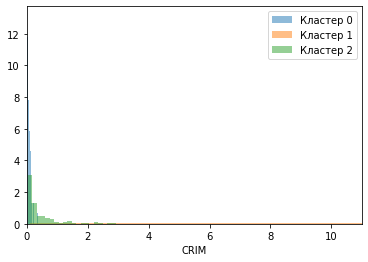

In [121]:
plt.hist(X_train.loc[labels_train == 0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, 'CRIM'], bins=20, density=True, alpha=0.5)

plt.xlim(0, 11)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM')

plt.show()